In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
file_path = "mobile.csv"
df = pd.read_csv(file_path)

In [3]:
# see first 5 data
df = df.drop(columns=['id'], errors='ignore')
print(df.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0 

In [4]:
# check type data on column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [5]:
# check describing data
print(df.describe(include='all'))

       battery_power         blue  clock_speed     dual_sim           fc  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     1248.510000     0.516000     1.540900     0.517000     4.593000   
std       432.458227     0.499994     0.829268     0.499961     4.463325   
min       500.000000     0.000000     0.500000     0.000000     0.000000   
25%       895.000000     0.000000     0.700000     0.000000     1.000000   
50%      1246.500000     1.000000     1.500000     1.000000     3.000000   
75%      1629.250000     1.000000     2.300000     1.000000     7.000000   
max      1999.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep   mobile_wt      n_cores  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.487000    33.652000     0.517500   139.51100     4.328000   
std       0.500081    18.128694     0.280861    34.85155     2.288155   
min       0.000000     

In [6]:
# check on column is null or not
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


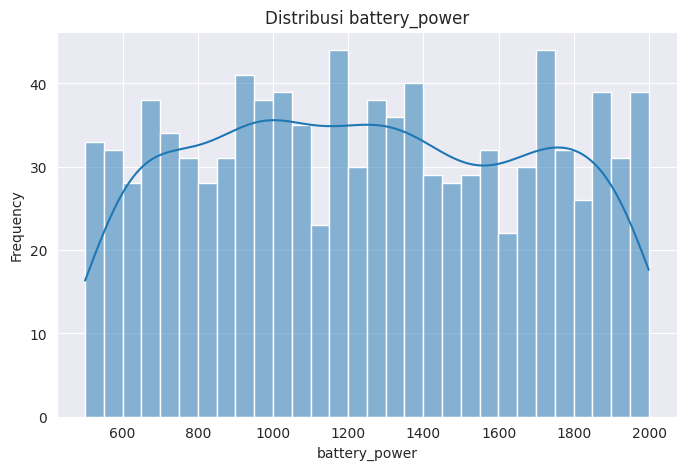

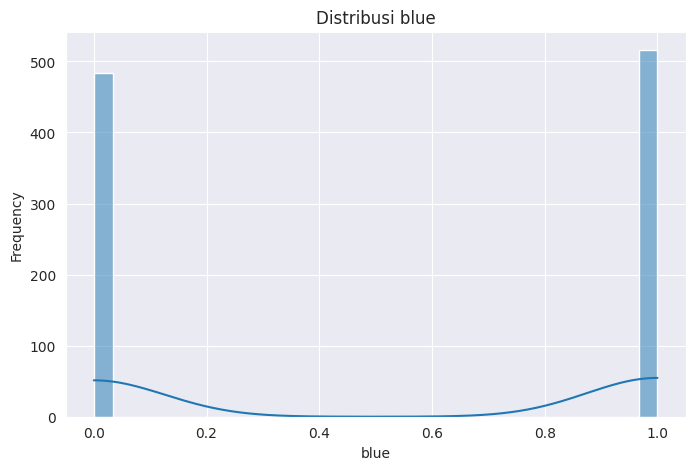

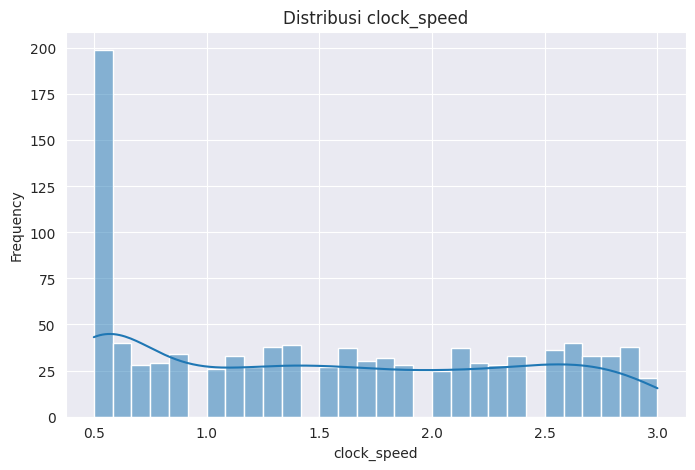

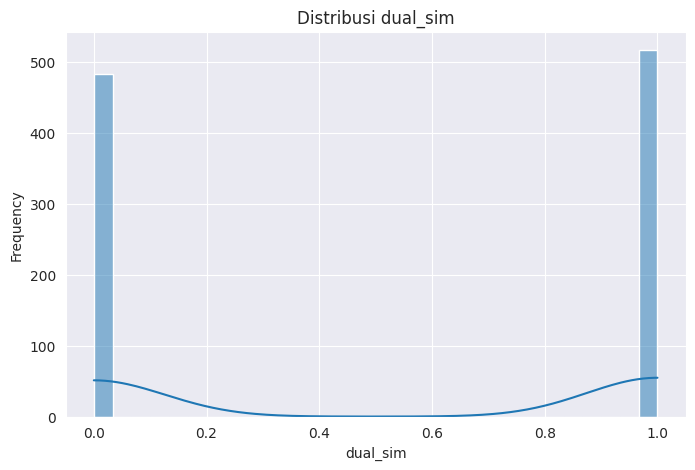

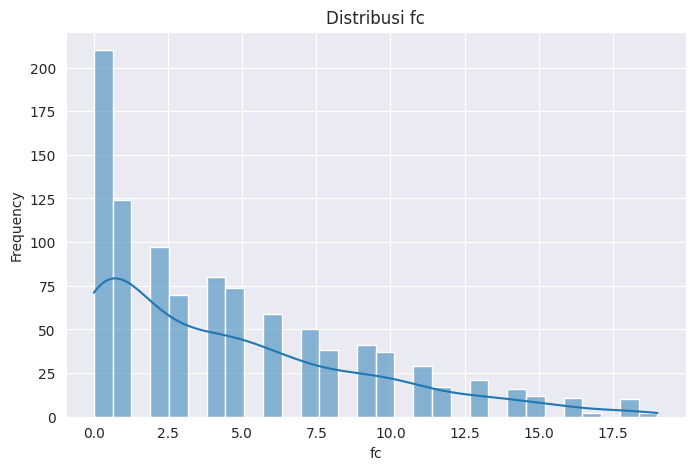

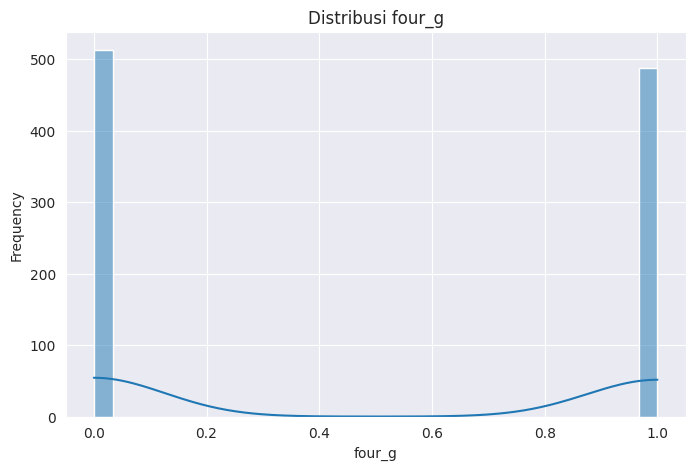

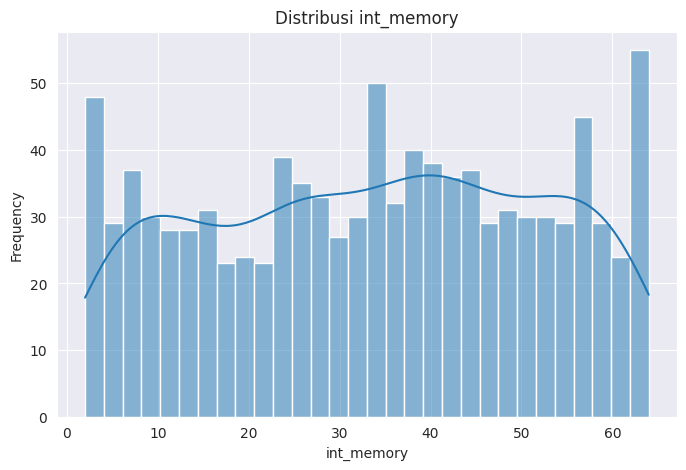

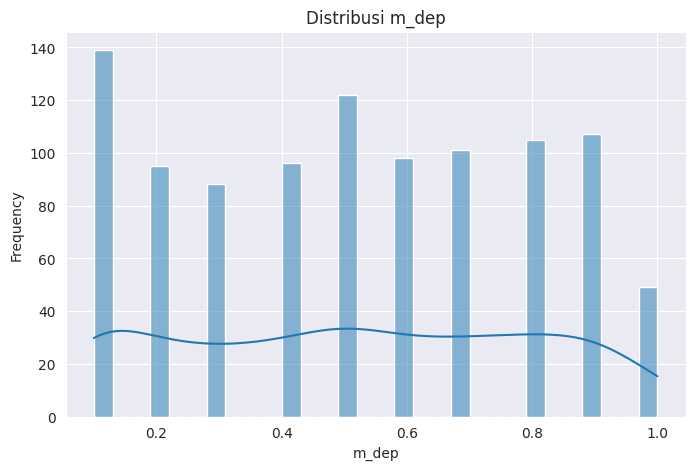

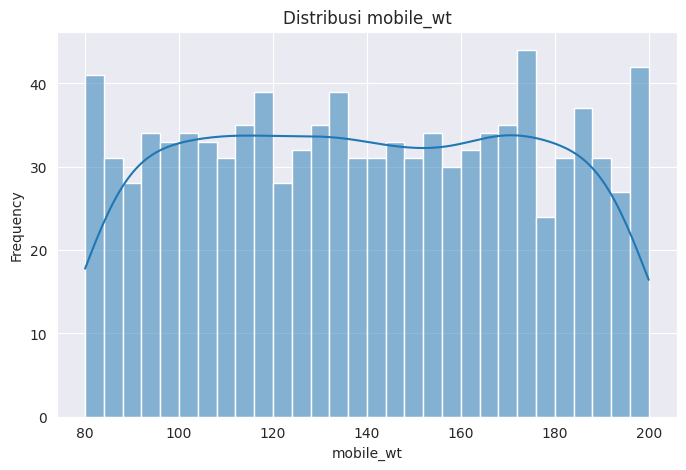

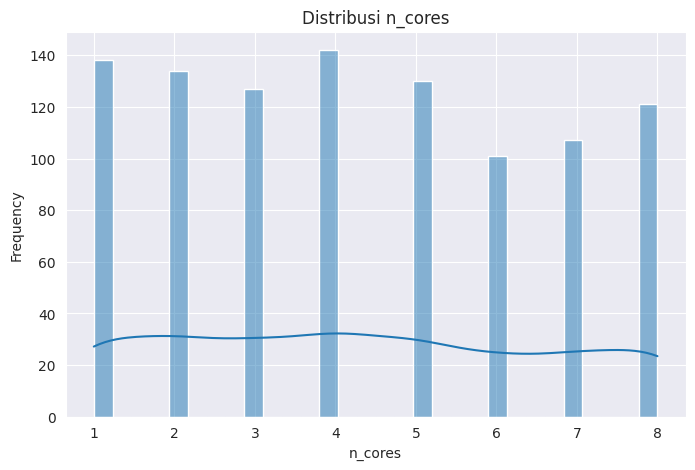

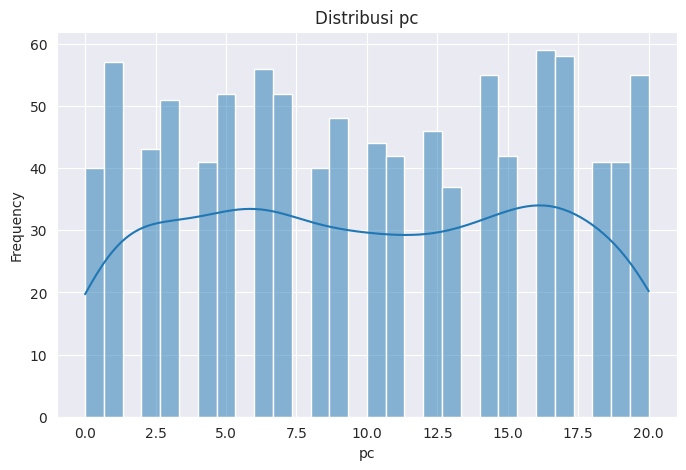

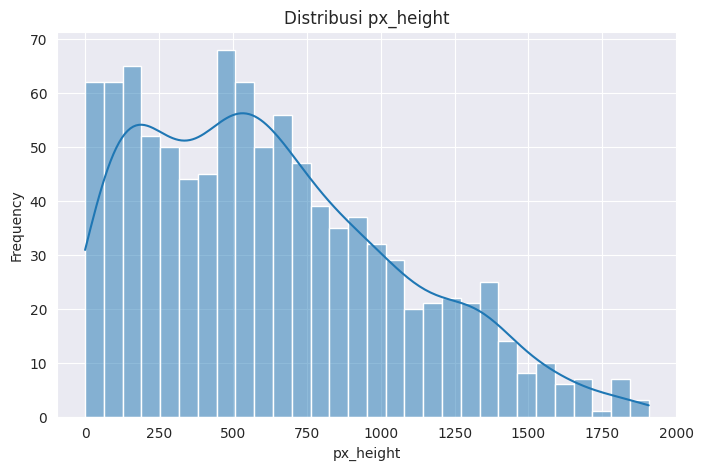

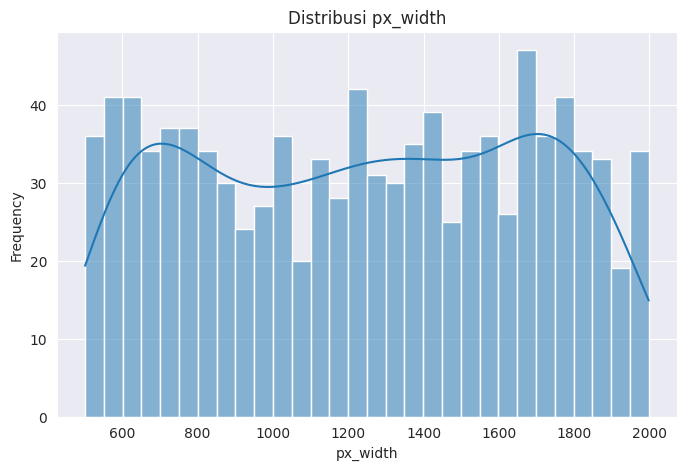

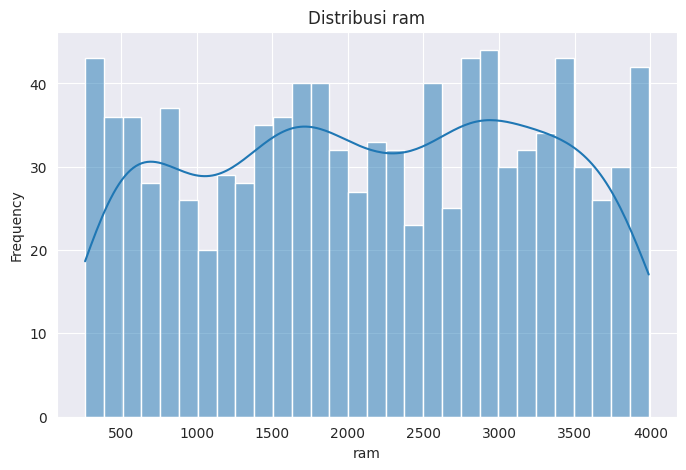

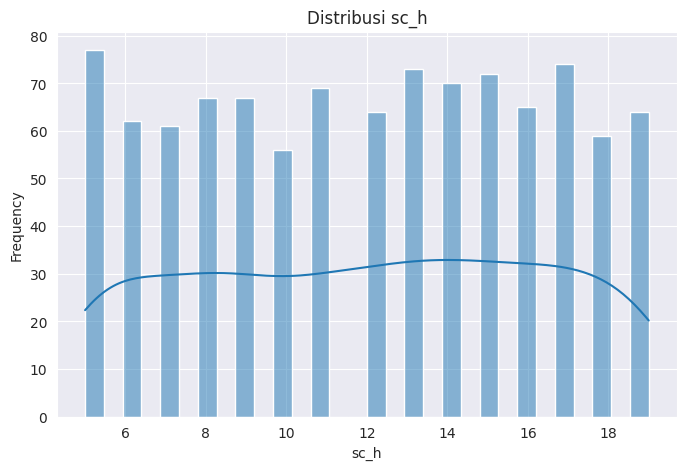

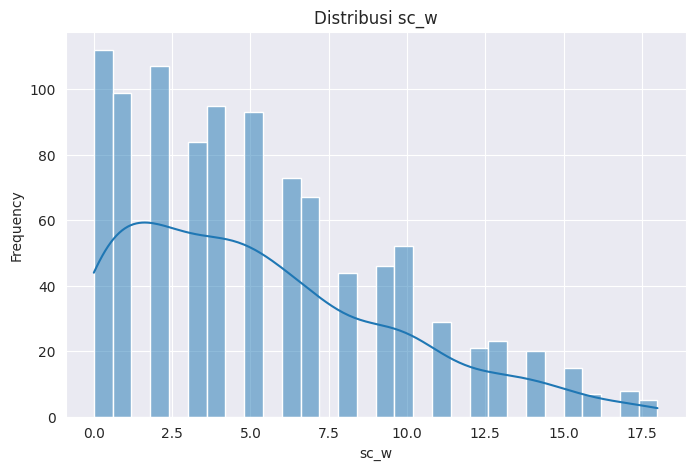

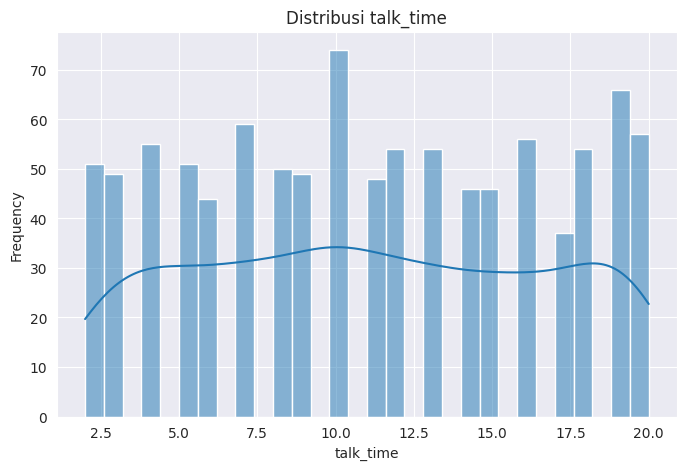

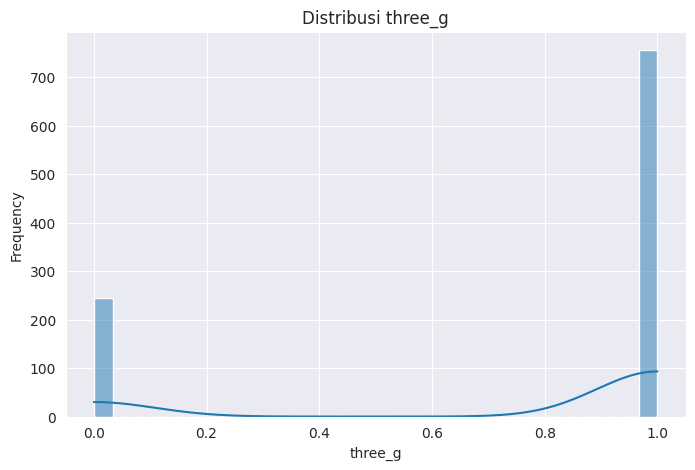

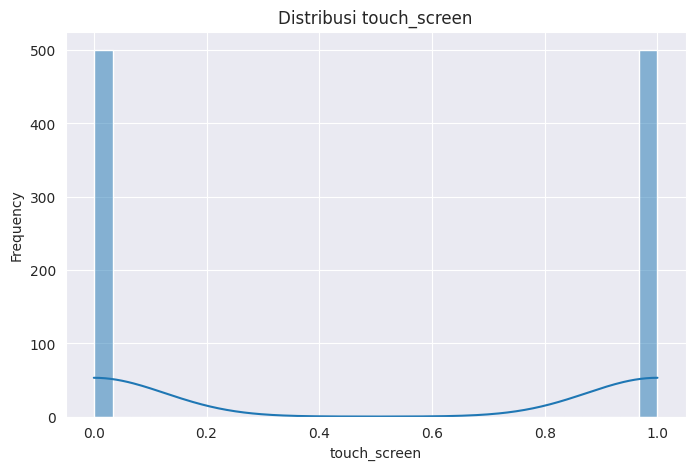

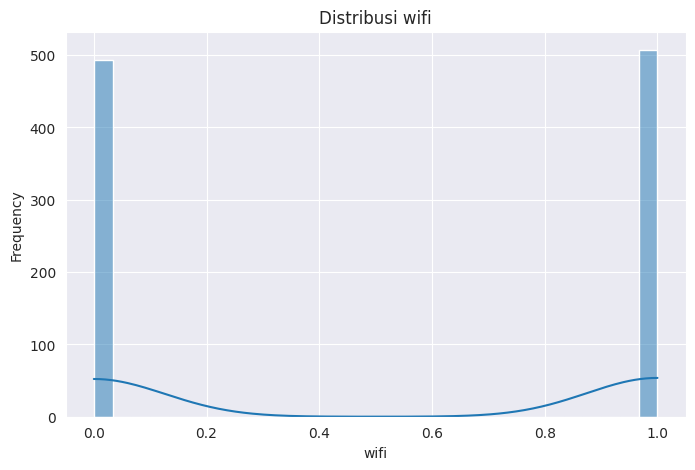

In [7]:
# mobile price distribution
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

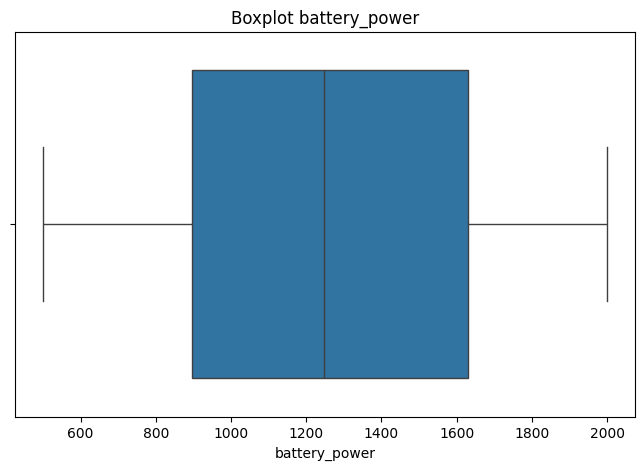

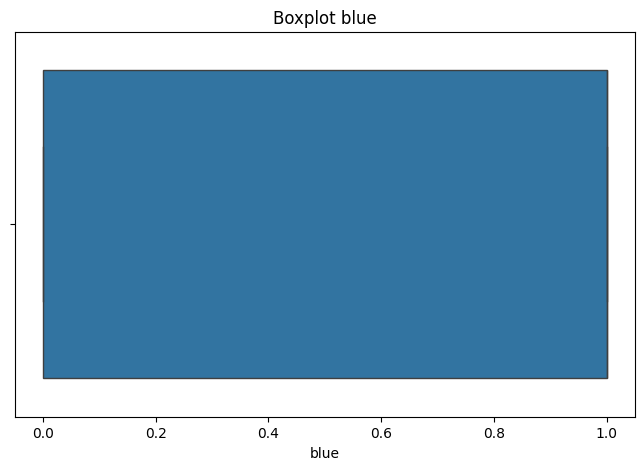

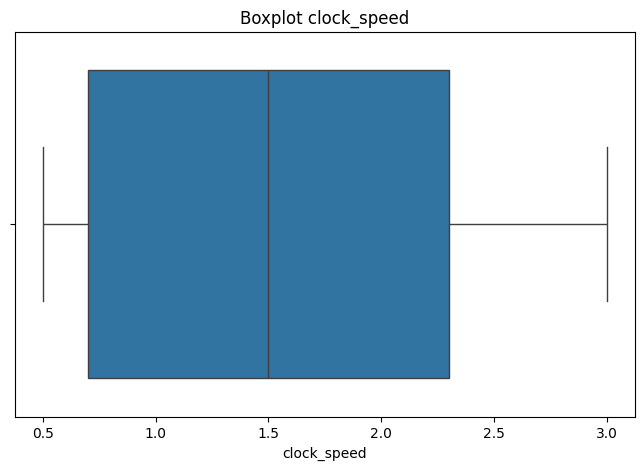

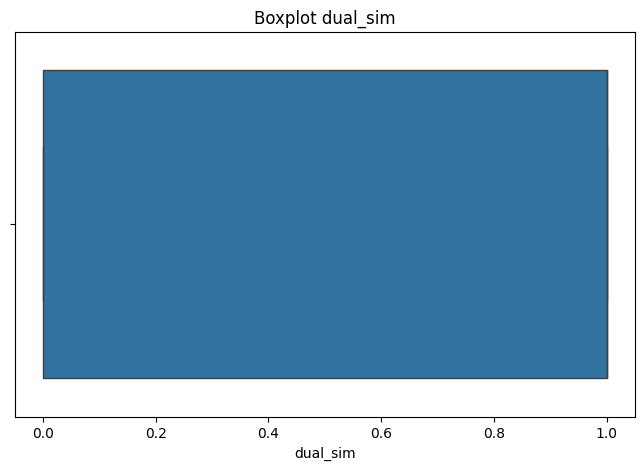

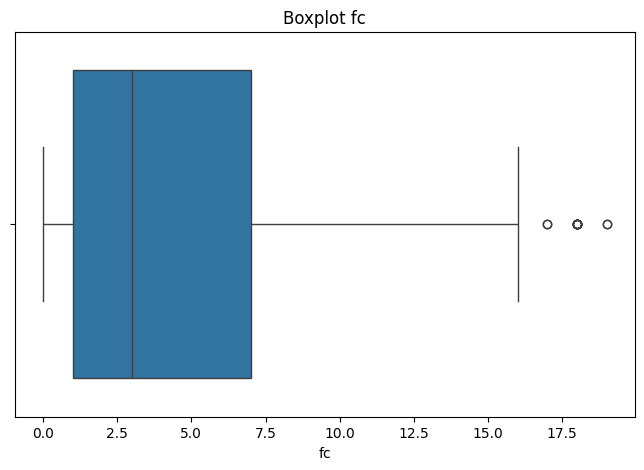

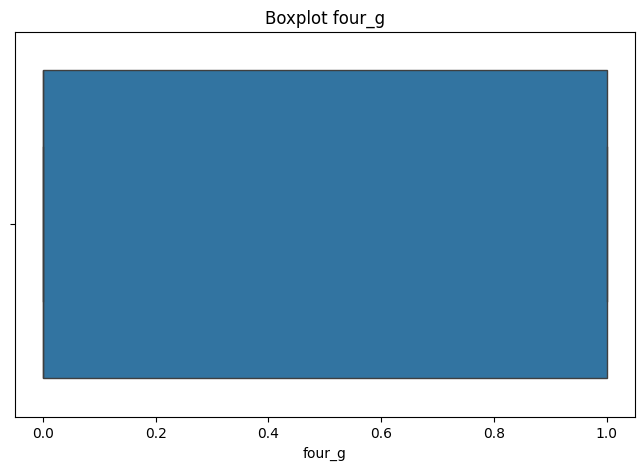

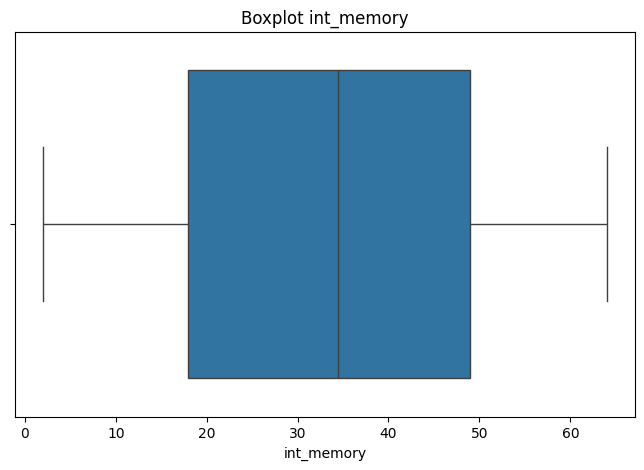

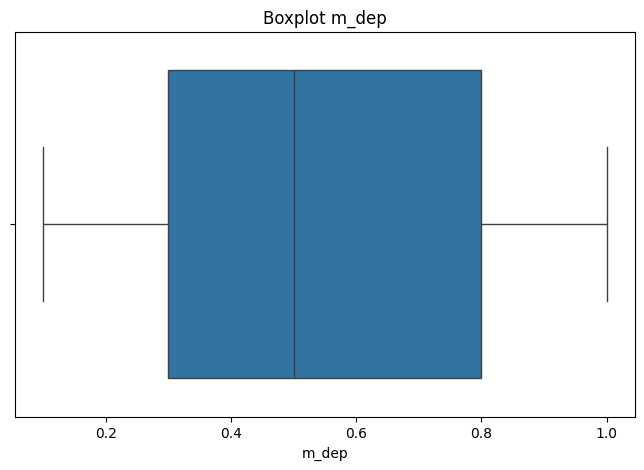

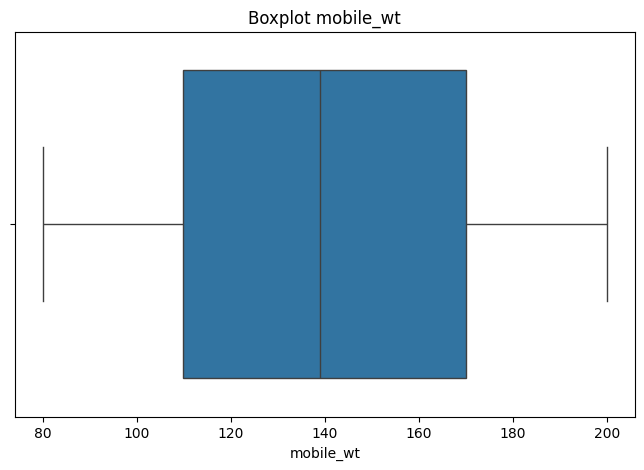

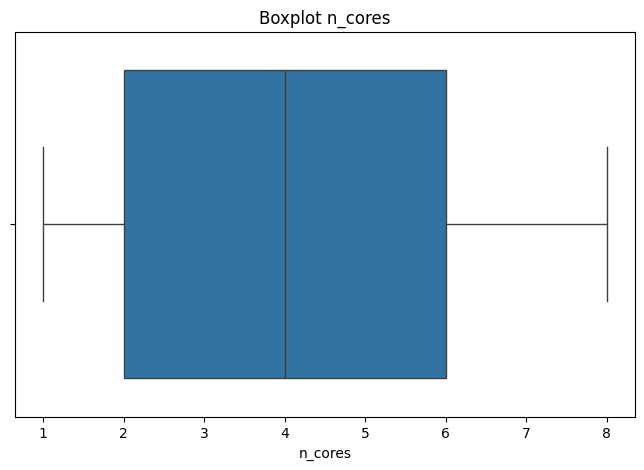

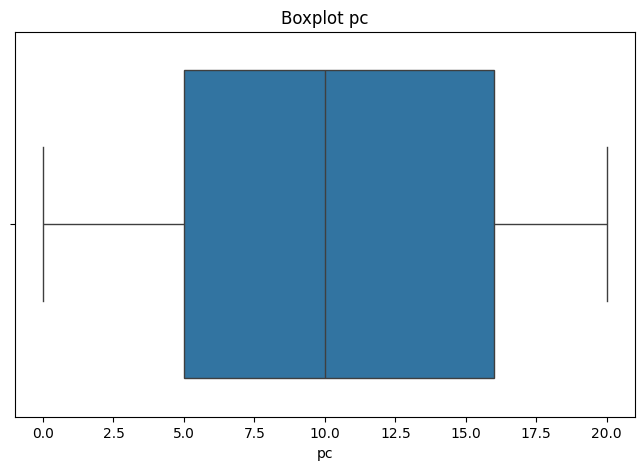

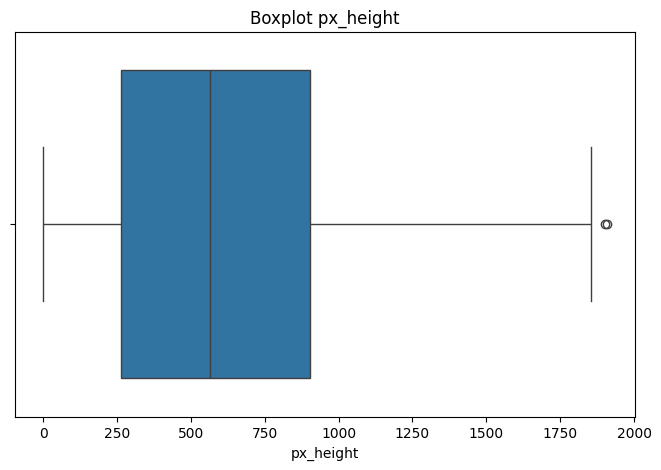

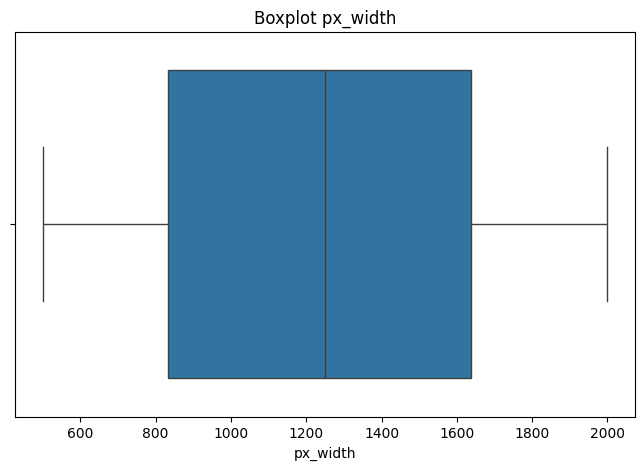

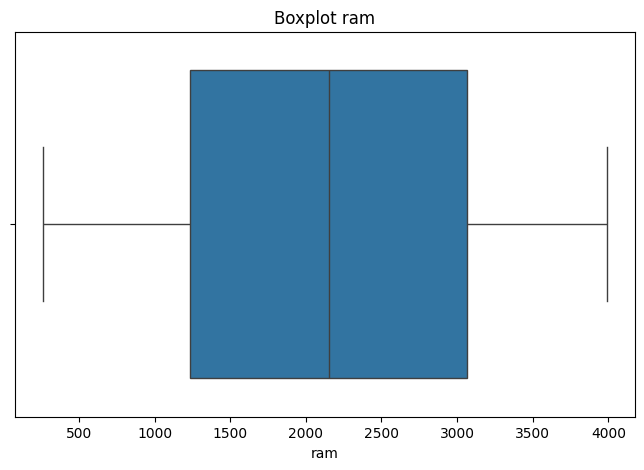

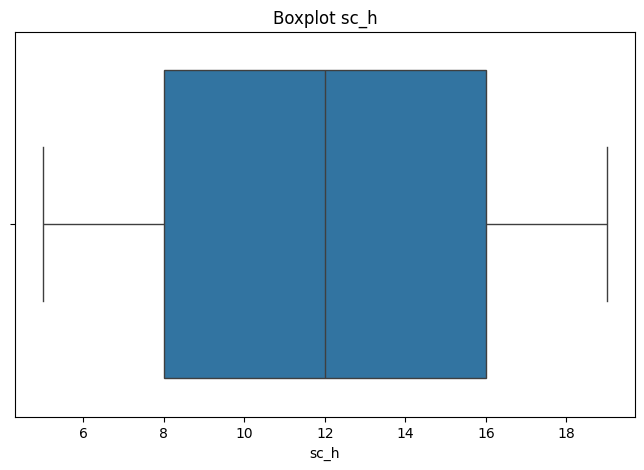

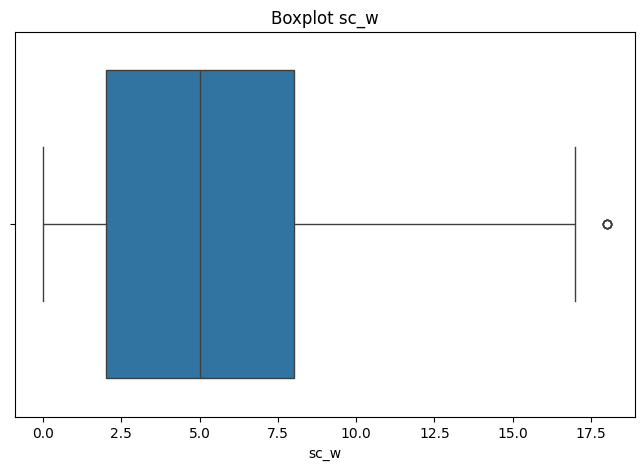

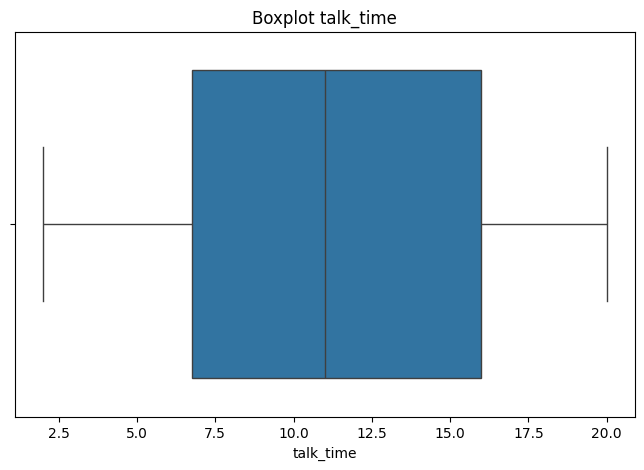

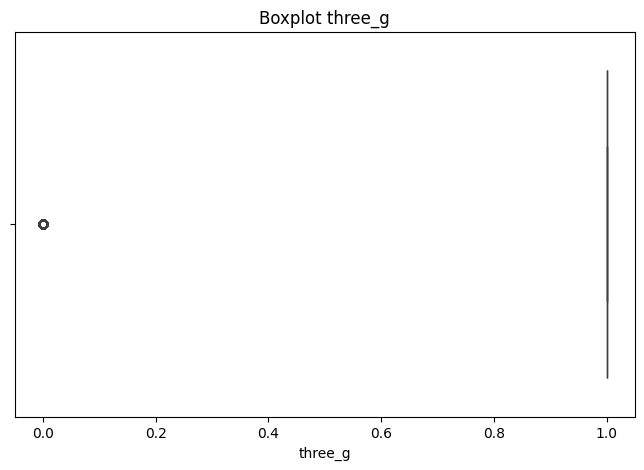

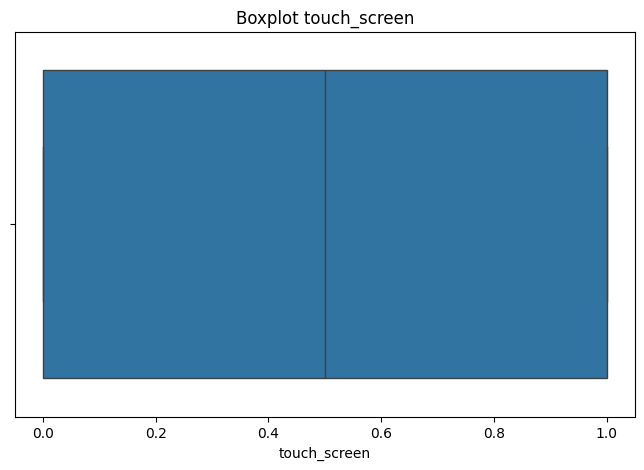

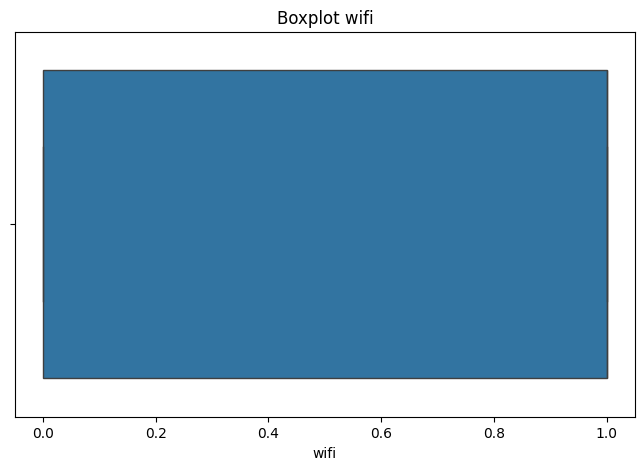

In [29]:
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

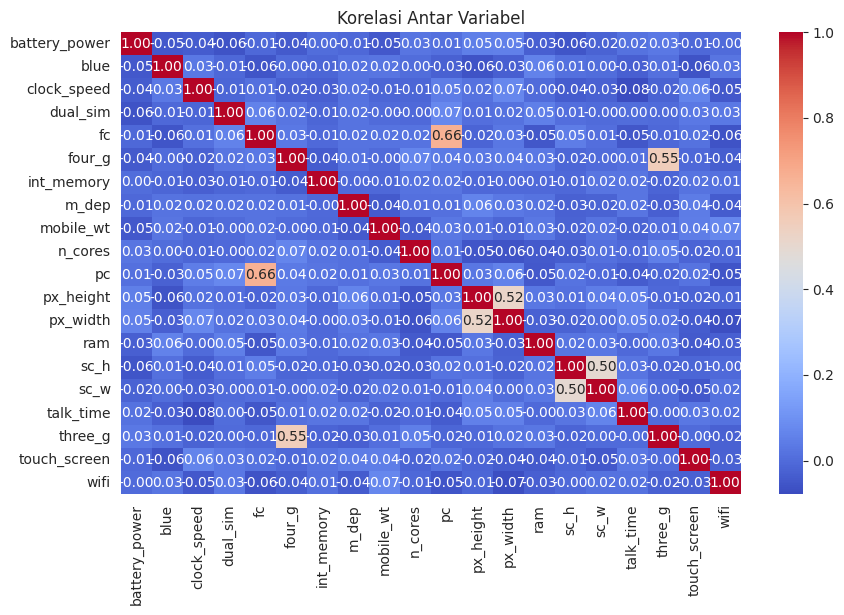

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.show()

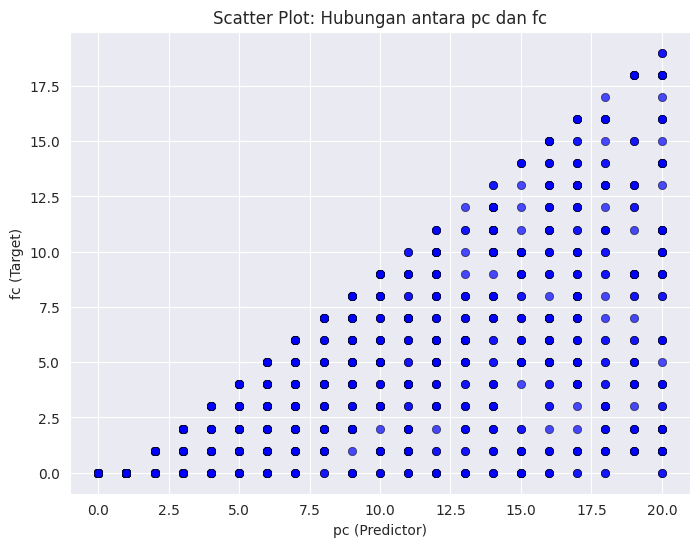

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["pc"], y=df["fc"], alpha=0.7, edgecolor="black", color="blue")

plt.xlabel("pc (Predictor)")
plt.ylabel("fc (Target)")
plt.title("Scatter Plot: Hubungan antara pc dan fc")
plt.show()

In [10]:
# Menghitung korelasi Pearson antara pc dan fc
correlation = df["pc"].corr(df["fc"])
print(f"Korelasi antara pc dan fc: {correlation:.2f}")

Korelasi antara pc dan fc: 0.66


In [11]:
contingency_table = pd.crosstab(df['three_g'], df['four_g'])
print("Tabel Kontingensi:\n", contingency_table)

Tabel Kontingensi:
 four_g     0    1
three_g          
0        244    0
1        269  487


In [15]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nHasil Uji Chi-Square:")
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")


Hasil Uji Chi-Square:
Chi-Square: 303.8205180679066
P-Value: 4.846479722142162e-68
Degrees of Freedom: 1


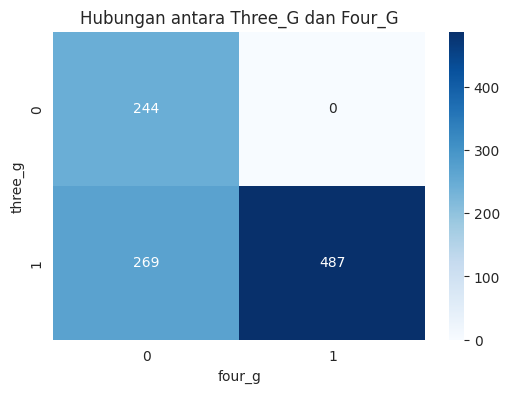

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.xlabel("four_g")
plt.ylabel("three_g")
plt.title("Hubungan antara Three_G dan Four_G")
plt.show()

In [17]:
# Cek apakah ada perangkat dengan four_g = 1 tetapi three_g = 0
invalid_cases = df[(df['four_g'] == 1) & (df['three_g'] == 0)]

# Menampilkan hasil analisis
if invalid_cases.empty:
    print("Semua perangkat yang memiliki 4G juga memiliki 3G.")
else:
    print(f"Ada {len(invalid_cases)} perangkat yang memiliki 4G tetapi tidak memiliki 3G.")
    print("Contoh data yang tidak sesuai:")
    print(invalid_cases.head())  # Menampilkan beberapa contoh jika ada

Semua perangkat yang memiliki 4G juga memiliki 3G.


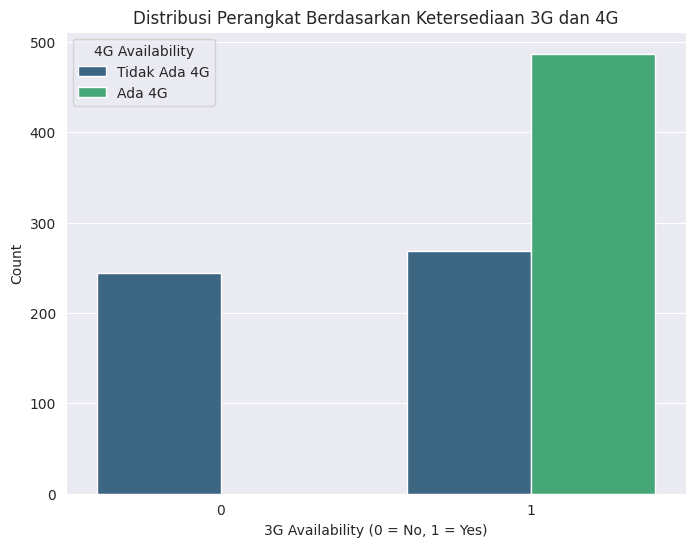

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="three_g", hue="four_g", palette="viridis")

# Tambahkan label dan judul
plt.xlabel("3G Availability (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Distribusi Perangkat Berdasarkan Ketersediaan 3G dan 4G")
plt.legend(title="4G Availability", labels=["Tidak Ada 4G", "Ada 4G"])

# Tampilkan grafik
plt.show()

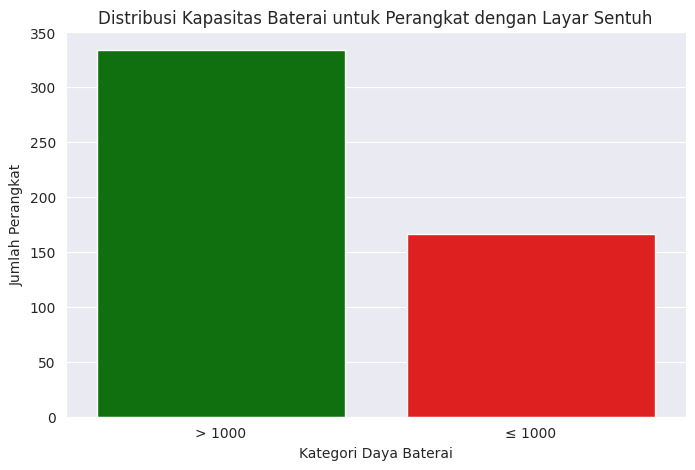

In [21]:
# Filter data dengan touch_screen = 1
touch_screen_df = df.loc[df["touch_screen"] == 1].copy()  # Menggunakan .copy() untuk menghindari SettingWithCopyWarning

# Kategorikan perangkat berdasarkan kapasitas baterai
touch_screen_df["battery_category"] = touch_screen_df["battery_power"].apply(lambda x: "≤ 1000" if x <= 1000 else "> 1000")

# Hitung jumlah perangkat dalam masing-masing kategori
battery_counts = touch_screen_df["battery_category"].value_counts().reset_index()
battery_counts.columns = ["battery_category", "count"]

# Plot grafik
plt.figure(figsize=(8, 5))
sns.barplot(data=battery_counts, x="battery_category", y="count", hue="battery_category", legend=False, palette={"≤ 1000": "red", "> 1000": "green"})
plt.xlabel("Kategori Daya Baterai")
plt.ylabel("Jumlah Perangkat")
plt.title("Distribusi Kapasitas Baterai untuk Perangkat dengan Layar Sentuh")
plt.show()

In [23]:
output_file = "touch_screen_battery_analysis.csv"
battery_counts.to_csv(output_file, index=False)
print(f"Data telah disimpan: {output_file}")

Data telah disimpan: touch_screen_battery_analysis.csv
